# Data visualisation project
> **UNIA Uzma**<br>
> **M1 MéDAS 2020-2021**

## Problématique

 Ayant un intérêt particulier pour la santé et les inégalités, j'analyserai comment ces deux enjeux sont liés. <br> Certaines études ont déjà été faites à ce sujet mais à une échelle beaucoup plus globale, notamment *The Spirit Level: Why Equality is Better for Everyone* de Richard G. Wilkinson et Kate Pickett. Cette étude aura un objectif commun avec ce livre, démontrer les effets des inégalités sociales sur la santé, mais en se concentrant sur la France et en explorant des maladies précises.

## Jeux de données

Les données proviennent de l'INSEE et les indicateurs ont été choisis en fonction du thème de l'inégalité tout en permettant une comparaison standardisée entre les départements :
- le taux de pauvreté est plus représentatif des disparités sociales comparé à une moyenne des revenus
- les taux de maladie standardisés homogénéisent les différences démographiques

## Questionnement et Méthode

La méthode part d'une approche "d'enquête" : on ne sait pas a priori si toutes les maladies sont liées au niveau de vie, si il y en a plus que d'autres, lesquelles seraient-elles et pourquoi. La structure du code représente donc l'enchaînement suivant : <br>
- Phase 1 Exploration : Sélection de plusieurs maladies répandues et de nature différente
- Phase 2 Focus : Visualisation pauvreté et diabète de type II
- Phase 3 Approfondissement : L'obésité et l'origine sociale

## Code

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from functools import reduce
import seaborn as sns
import geopandas as gpd
from matplotlib.ticker import FuncFormatter

In [2]:
items = os.listdir('Data/geodes')

files_list = []

for file in items:
    if file.endswith('.csv'):
        files_list.append(file)

In [3]:
maladies = []
for file in files_list:
    df = pd.read_csv(f"Data/geodes/{file}", sep=';', header=2)
    maladies.append(df)  

In [4]:
pauvrete = pd.read_csv('Data/pauvrete.csv', sep=';')
pauvrete = pauvrete.loc[:, ['CODGEO', 'MED17', 'TP6017']]
pauvrete.columns = ['Code', 'Médiane du niveau de vie', 'Taux de pauvreté']

### Phase 1 : Trouver les coefficients de corrélation entre le niveau de vie et plusieurs maladies

In [5]:
merged = reduce(lambda left, right: pd.merge(left, right), maladies)

In [6]:
social_data = pauvrete.merge(merged, left_on='Code', right_on='Code')

In [7]:
social_data

,Code,Médiane du niveau de vie,Taux de pauvreté,Libellé,Taux d'hospitalisation pour pathologies ORL 2020-S43,Taux standardisé de tentatives de suicide 2017,Taux d'hospitalisation pour asthme 2020-S44,Taux d'hospitalisation pour gastro-entérite aiguë 2020-S44,Taux de notification - méningocoque B 2019,Taux standardisé de patients hospitalisés pour AVC 2016,Taux de prévalence standardisé de la maladie de Parkinson 2015,Taux de prévalence standardisé de diabète traité pharmacologiquement 2016,Taux de sérologies positives pour VIH 2018
0,01,22640,10.5,Ain,0.0,110.5,5000.0,0.0,0.00,154.1,2.56,4.39,0.6
1,02,19100,18.5,Aisne,119.0,224.1,1538.0,1000.0,0.38,171.6,2.35,6.27,0.7
2,03,19750,15.4,Allier,0.0,161.8,0.0,2222.2,0.00,163.9,2.40,5.19,1.6
3,04,19940,16.6,Alpes-de-Haute-Provence,357.0,145.5,1000.0,1250.0,0.61,148.1,2.29,4.32,NaN
4,05,20350,13.9,Hautes-Alpes,0.0,144.5,4000.0,1428.6,1.41,143.9,2.59,3.91,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,93,17310,27.9,Seine-Saint-Denis,290.0,58.6,2364.0,1428.6,0.12,193.9,2.16,7.76,2.9
94,94,22290,16.3,Val-de-Marne,338.0,77.6,2157.0,1219.5,0.21,166.3,2.24,5.47,2.9
95,95,21470,16.6,Val-d'Oise,101.0,85.4,2581.0,1000.0,0.08,174.2,2.62,6.43,1.8
96,972,17580,28.6,Martinique,NaN,84.6,NaN,NaN,0.28,199.0,1.64,7.67,2.8


In [8]:
fig = plt.figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

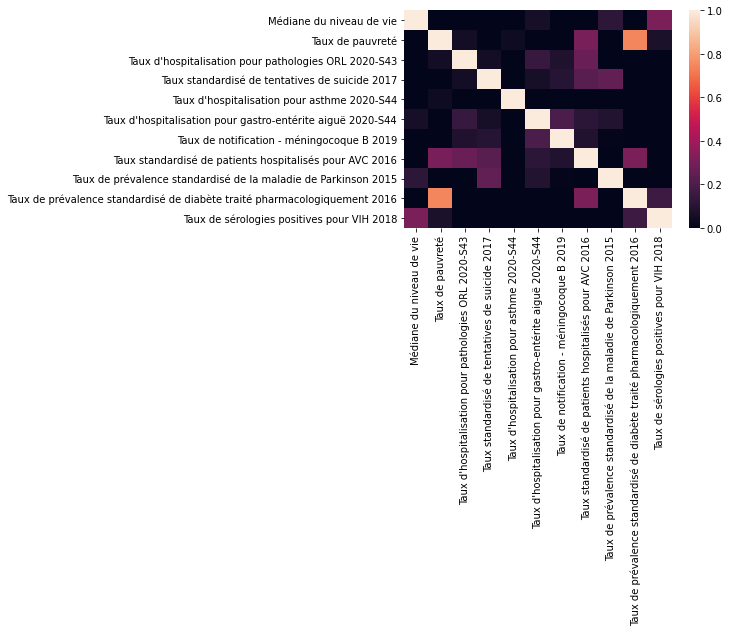

In [9]:
sns.heatmap(social_data.corr(), vmin=0)

> #### Bilan Phase d'Exploration
> Le constat est que le niveau de vie semble être surtout corrélé avec le diabète.

### Phase 2 : Focus - Lien entre niveau de vie et diabète de type 2

In [12]:
fp = 'Data/Geo/Dep/departements-20140306-5m.shp'

In [13]:
map_df = gpd.read_file(fp)

In [14]:
metropole = map_df[:96]

In [15]:
social_data_pauvrete = social_data[['Code', 'Taux de pauvreté']]
social_data_diabete = social_data[['Code', 'Taux de prévalence standardisé de diabète traité pharmacologiquement 2016']]
social_data_diabete = social_data_diabete.rename(columns={'Taux de prévalence standardisé de diabète traité pharmacologiquement 2016':'Diabète type II'})

In [16]:
diabete_geo = metropole.merge(social_data_diabete, left_on='code_insee', right_on='Code')
pauvrete_geo = metropole.merge(social_data_pauvrete, left_on='code_insee', right_on='Code')

In [17]:
variable1 = 'Diabète type II'
variable2 = 'Taux de pauvreté'
vmin, vmax = 120, 220

Text(0.5, 1.0, 'Taux de pauvreté')

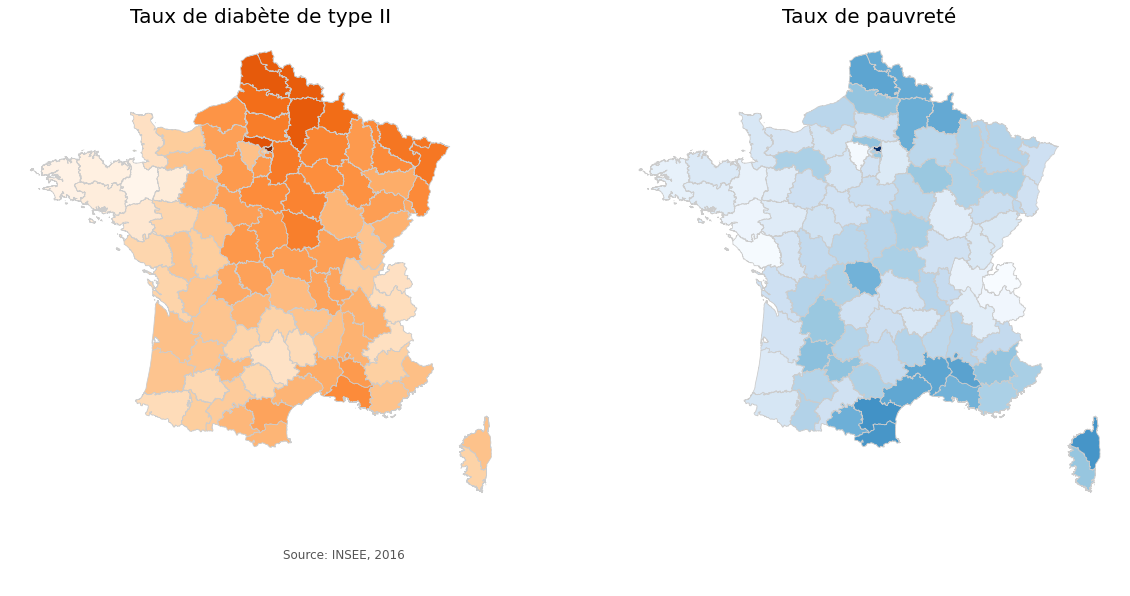

In [18]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

diabete_geo.plot(column=variable1, cmap='Oranges', linewidth=0.8, ax=ax1, edgecolor='0.8')
ax1.axis('off')
ax1.set_title('Taux de diabète de type II', fontsize=20)
ax1.annotate('Source: INSEE, 2016', xy=(0.25, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

pauvrete_geo.plot(column=variable2, cmap='Blues', linewidth=0.8, ax=ax2, edgecolor='0.8')
ax2.axis('off')
ax2.set_title('Taux de pauvreté', fontsize=20)

> #### Bilan Phase 2
> Les cartes du diabète et du taux de pauvreté se superposent quasiment.
> Pour étayer le lien entre diabète II et niveau de vie, nous l'analyserons en fonction des critères sociaux plutôt que géographiques.

### Phase 3 : Approfondissement sur l'obésité et l'origine sociale

In [21]:
obesite = pd.read_excel('Data/surpoids 2012.xls', 'graph1', header=2, names = ['Catégorie socioprofessionnelle du père', 'Surpoids', 'Obésité'])
obesite = obesite[:9]

In [22]:
plt.style.use('ggplot')

Text(0.5, 1.0, "Taux d'obésité en classe de 3ème en fonction de la catégorie socioprofessionnelle du père")

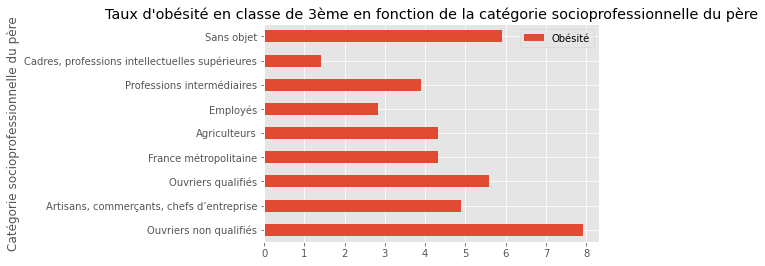

In [29]:
fig, ax = plt.subplots()
obesite.plot(kind='barh', y='Obésité', x='Catégorie socioprofessionnelle du père', ax=ax)
plt.title("Taux d'obésité en classe de 3ème en fonction de la catégorie socioprofessionnelle du père")

> #### Bilan Phase 3
> Les adolescents les plus touchés sont ceux dont le père est ouvrier, artisan, commerçant ou chef d'entreprise.

## Conclusion

D'après les graphiques, il existe une relation avec le niveau de vie pour une maladie en particulier parmis celles qui faisaient partie des jeux de données : le diabète de type II.<br>
Afin de vérifier ce lien, nous prenons des données sur l'obésité dont le lien est établi avec le diabète de type II. D'après cette analyse, il y a également une corrélation entre la classe sociale et le taux d'obésité.
<br>
En conclusion, le niveau de vie a un impact sur l'obésité et le diabète de type II. Ce phénomène avait été formulé dans le livre présenté au début de cette étude.

## Discussion et Critique

Naturellement, l'analyse répond à un questionnement tout en amenant un autre, pourquoi ce lien entre diabète/obésité et taux de pauvreté est-il plus marqué que les autres maladies ? <br><br>
Premièrement, le système de santé français vise à atténuer les inégalités face à l'accès aux soins, ce qui peut expliquer une faible corrélation entre santé et origine sociale en général (surtout si l'on compare à d'autre pays avec un système de santé plus inégalitaire). <br>
Plusieurs hypothèses permettent d'expliquer des comportements face à la nourriture variant selon l'origine sociale. D'abord la nourriture est le confort le plus accessible, celui qui est en général préféré pour diminuer le stress. Des catégories sociales supérieures auraient accès à d'autres stratégies. Deuxièmement la nourriture moins chère est souvent de moins bonne qualité, moins nutritive avec des sucres ajoutés et donc potentiellement addictive. Dernièrement, richesse et minceur sont encore associés dans les imaginaires collectifs. <br>
Toutes ces interprétations sont basées sur des corrélations qui méritraient un étude plus approfondie étant donnée la nature intrinsèquement complexe des problèmes sociaux.

Merci pour votre lecture.